# Análise da diferença salarial para trabalhadores de TI conforme a raça de cada indivíduo.



Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres com funções trabalhistas de TI distribuídos em qualquer setor produtivo na cidade de sorocaba, conforme a raça de cada indivíduo em um recorte de 2012, 2013 e 2014.

## Etapas iniciais para realização das análises:


### Imports necessários para realização dos processamentos e análises:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [2]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
raca_2012 = {1: 'Indigena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda'}
raca_2013 = {1: 'Indigena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda'}
raca_2014 = {1: 'Indigena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV para 2012, 2013 e 2014:


In [4]:
# Leitura da tabela de dados gerais para 2012:
RAIS_GERAL_2012 = pd.read_csv("../data/SP2012.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2012.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [5]:
# Leitura da tabela de dados gerais para 2013:
RAIS_GERAL_2013 = pd.read_csv("../data/SP2013.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2013.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [6]:
# Leitura da tabela de dados gerais para 2014:
RAIS_GERAL_2014 = pd.read_csv("../data/SP2012.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2014.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de raça para utilização correta:


In [8]:
RAIS_GERAL_2012 = RAIS_GERAL_2012[RAIS_GERAL_2012["Raça"] != 9]
RAIS_GERAL_2012 = RAIS_GERAL_2012[RAIS_GERAL_2012["Raça"] != 99]

RAIS_GERAL_2013 = RAIS_GERAL_2013[RAIS_GERAL_2013["Raça"] != 9]
RAIS_GERAL_2013 = RAIS_GERAL_2013[RAIS_GERAL_2013["Raça"] != 99]

RAIS_GERAL_2014 = RAIS_GERAL_2014[RAIS_GERAL_2014["Raça"] != 9]
RAIS_GERAL_2014 = RAIS_GERAL_2014[RAIS_GERAL_2014["Raça"] != 99]

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):



In [10]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2012 (data dos dados para 2012) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2012 = 1.94801240

RAIS_GERAL_2012["Remuneração"] = RAIS_GERAL_2012["Remuneração"] * fator_correcao_inflacao_2012

# Índice de correção de inflação para o período de 12/2013 (data dos dados para 2013) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2013 = 1.84499480

RAIS_GERAL_2013["Remuneração"] = RAIS_GERAL_2013["Remuneração"] * fator_correcao_inflacao_2013

# Índice de correção de inflação para o período de 12/2014 (data dos dados para 2014) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2014 = 1.73509650

RAIS_GERAL_2014["Remuneração"] = RAIS_GERAL_2014["Remuneração"] * fator_correcao_inflacao_2014

### Exibição das tabelas gerais para cada ano:


In [12]:
# Exibindo os cinco primeiros dados da tabela de 2012:
RAIS_GERAL_2012.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62031,4,6,26,355220,2,"9,467.34",1
1,317110,62015,6,6,41,355220,2,"2,115.54",1
3,317110,62091,3,7,21,355220,2,"4,234.98",1
5,317210,63119,3,7,18,355220,2,"1,422.05",1
6,212405,63119,4,7,26,355220,2,"2,290.86",1


In [13]:
# Exibindo os cinco primeiros dados da tabela de 2013:
RAIS_GERAL_2013.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
2,212420,62040,6,7,45,355220,2,"3,160.29",1
3,212420,62040,6,7,49,355220,2,"16,904.32",1
4,212420,62040,5,7,30,355220,4,"2,844.28",1
5,212420,62040,4,7,26,355220,2,"15,029.42",1
6,212420,62040,4,7,27,355220,2,"7,072.75",1


In [14]:
# Exibindo os cinco primeiros dados da tabela de 2014:
RAIS_GERAL_2014.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62031,4,6,26,355220,2,"8,432.57",1
1,317110,62015,6,6,41,355220,2,"1,884.31",1
3,317110,62091,3,7,21,355220,2,"3,772.10",1
5,317210,63119,3,7,18,355220,2,"1,266.62",1
6,212405,63119,4,7,26,355220,2,"2,040.47",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a raça de cada indivíduo:

### Criação das tabelas para relatório e tabela para formação do gráfico:


In [27]:
# Tabela principal para quantidade em 2012:
RAIS_GERAL_2012_QNT = pd.crosstab(RAIS_GERAL_2012["Raça"].replace(raca_2012), RAIS_GERAL_2012["Sexo"].replace(sexo))
RAIS_GERAL_2012_QNT.insert(1, "% Fem.", RAIS_GERAL_2012_QNT["Fem."] / (RAIS_GERAL_2012_QNT["Fem."] + RAIS_GERAL_2012_QNT["Masc."]) * 100)
RAIS_GERAL_2012_QNT.insert(3, "% Masc.", RAIS_GERAL_2012_QNT["Masc."] / (RAIS_GERAL_2012_QNT["Fem."] + RAIS_GERAL_2012_QNT["Masc."]) * 100)

RAIS_GERAL_2012_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Branca,45,23.44,147,76.56
Parda,2,50.00,2,50.00
Preta,0,0.00,5,100.00


In [29]:
# Tabela principal para quantidade em 2013:
RAIS_GERAL_2013_QNT = pd.crosstab(RAIS_GERAL_2013["Raça"].replace(raca_2013), RAIS_GERAL_2013["Sexo"].replace(sexo))
RAIS_GERAL_2013_QNT.insert(1, "% Fem.", RAIS_GERAL_2013_QNT["Fem."] / (RAIS_GERAL_2013_QNT["Fem."] + RAIS_GERAL_2013_QNT["Masc."]) * 100)
RAIS_GERAL_2013_QNT.insert(3, "% Masc.", RAIS_GERAL_2013_QNT["Masc."] / (RAIS_GERAL_2013_QNT["Fem."] + RAIS_GERAL_2013_QNT["Masc."]) * 100)

RAIS_GERAL_2013_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Branca,50,22.32,174,77.68
Parda,2,16.67,10,83.33
Preta,0,0.00,6,100.00


In [31]:
# Tabela principal para quantidade em 2014:
RAIS_GERAL_2014_QNT = pd.crosstab(RAIS_GERAL_2014["Raça"].replace(raca_2014), RAIS_GERAL_2014["Sexo"].replace(sexo))
RAIS_GERAL_2014_QNT.insert(1, "% Fem.", RAIS_GERAL_2014_QNT["Fem."] / (RAIS_GERAL_2014_QNT["Fem."] + RAIS_GERAL_2014_QNT["Masc."]) * 100)
RAIS_GERAL_2014_QNT.insert(3, "% Masc.", RAIS_GERAL_2014_QNT["Masc."] / (RAIS_GERAL_2014_QNT["Fem."] + RAIS_GERAL_2014_QNT["Masc."]) * 100)

RAIS_GERAL_2014_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
Raça,,,,
Branca,45,23.44,147,76.56
Parda,2,50.00,2,50.00
Preta,0,0.00,5,100.00


In [33]:
# Tabela para gráfico da quantidade em 2012:
RAIS_GERAL_2012_QNT.insert(4, "Total", RAIS_GERAL_2012_QNT["% Masc."] + RAIS_GERAL_2012_QNT["% Fem."])
RAIS_GERAL_2012_QNT.insert(5, "Ano", "2012")

# Tabela para gráfico da quantidade em 2013:
RAIS_GERAL_2013_QNT.insert(4, "Total", RAIS_GERAL_2013_QNT["% Masc."] + RAIS_GERAL_2013_QNT["% Fem."])
RAIS_GERAL_2013_QNT.insert(5, "Ano", "2013")

# Tabela para gráfico da quantidade em 2014:
RAIS_GERAL_2014_QNT.insert(4, "Total", RAIS_GERAL_2014_QNT["% Masc."] + RAIS_GERAL_2014_QNT["% Fem."])
RAIS_GERAL_2014_QNT.insert(5, "Ano", "2014")

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2012_QNT, RAIS_GERAL_2013_QNT, RAIS_GERAL_2014_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:


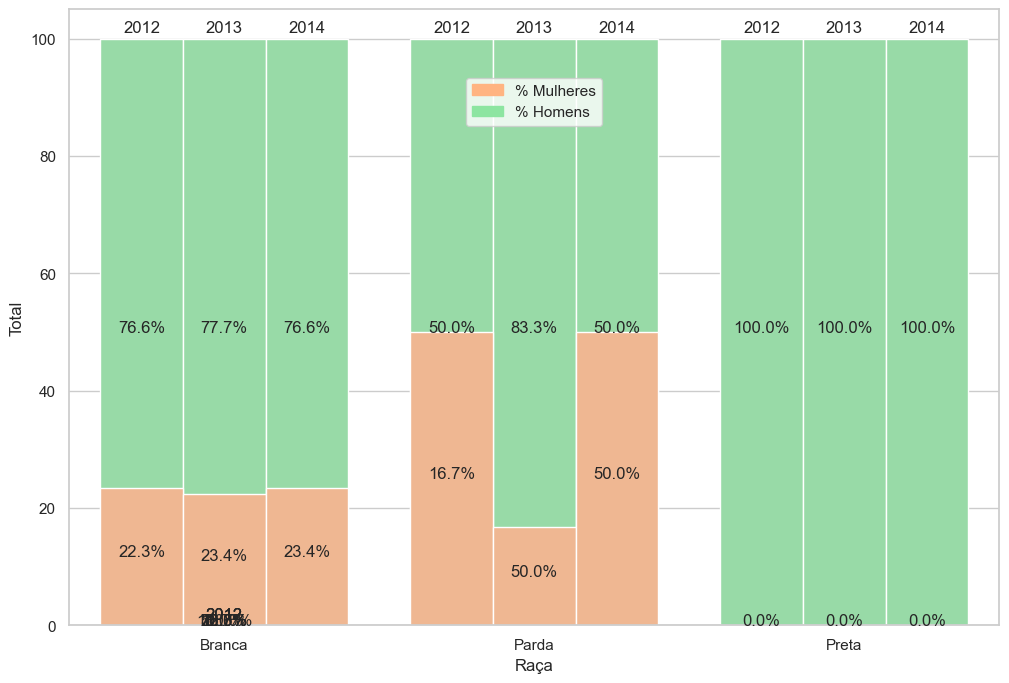

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(12, 8))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="Raça", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2012": color_masc, "2013": color_masc, "2014": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()/2
    
    # Use o índice correto do DataFrame
    index = i % len(RAIS_GERAL_QNT_GRAF)
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][index]), (x, y), ha='center')

# Escrita do valor do ano para cada barra em dupla:
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height() + 1
    
    # Use o índice correto do DataFrame
    index = i % len(RAIS_GERAL_QNT_GRAF)
    bar1.annotate('{}'.format(RAIS_GERAL_QNT_GRAF["Ano"][index]), (x, y), ha='center')

# Criação da segunda barra, referente à porcentagem das mulheres:
bar2 = sns.barplot(x="Raça", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2012": color_fem, "2013": color_fem, "2014": color_fem})

# Captura das barras recém criadas:
patches = bar2.patches[len(patches)//2:]  # Considera apenas as novas barras

# Escrita da porcentagem para cada barra capturada das mulheres:
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()/2
    
    # Use o índice correto do DataFrame
    index = (i + len(bar1.patches)//2) % len(RAIS_GERAL_QNT_GRAF)
    bar2.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Fem."][index]), (x, y), ha='center')

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

# Salvar o gráfico
plt.savefig("./figures/svg/qnt_sexo_raca.svg")
plt.show()


## Análise das médias salariais e diferenças:


### Distribuição da remuneração para cada sexo cruzado pela raça:


In [59]:
# Criação da tabela para o boxplot para 2012
RAIS_GERAL_2012_BOX = RAIS_GERAL_2012
RAIS_GERAL_2012_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2012_BOX["Raça"].replace(raca_2012, inplace = True)

RAIS_GERAL_2012_BOX

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62031,4,6,26,355220,Branca,"9,467.34",Masc.
1,317110,62015,6,6,41,355220,Branca,"2,115.54",Masc.
3,317110,62091,3,7,21,355220,Branca,"4,234.98",Masc.
5,317210,63119,3,7,18,355220,Branca,"1,422.05",Masc.
6,212405,63119,4,7,26,355220,Branca,"2,290.86",Masc.
...,...,...,...,...,...,...,...,...,...
330,317205,62091,4,9,29,355220,Branca,"2,703.92",Fem.
331,317115,62015,3,9,22,355220,Branca,857.11,Fem.
332,212405,62031,4,9,27,355220,Branca,"5,515.35",Fem.
333,212405,62031,4,9,27,355220,Branca,"4,480.43",Fem.


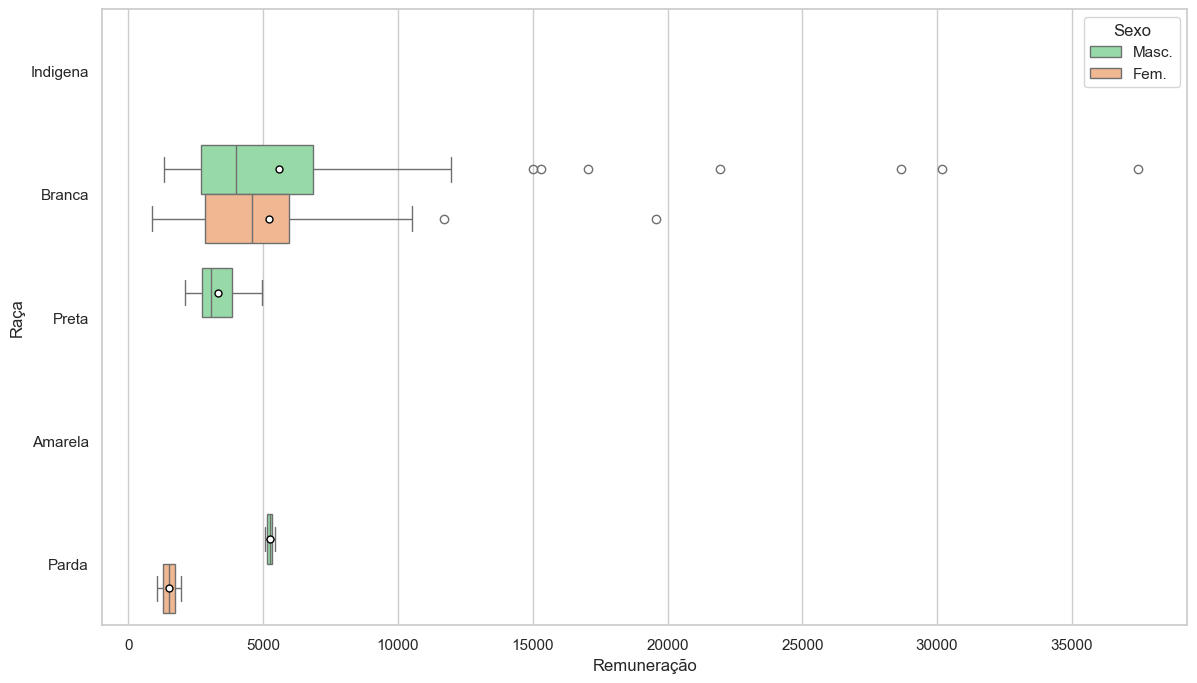

In [47]:
# Criação do boxplot para 2012:
box = sns.boxplot(x = 'Remuneração', y = 'Raça', hue = 'Sexo', data = RAIS_GERAL_2012_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = raca_2012.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_raca_2012.png", dpi = 300)

In [57]:
# Criação da tabela para o boxplot para 2013
RAIS_GERAL_2013_BOX = RAIS_GERAL_2013
RAIS_GERAL_2013_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2013_BOX["Raça"].replace(raca_2013, inplace = True)

RAIS_GERAL_2013_BOX

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
2,212420,62040,6,7,45,355220,Branca,"3,160.29",Masc.
3,212420,62040,6,7,49,355220,Branca,"16,904.32",Masc.
4,212420,62040,5,7,30,355220,Preta,"2,844.28",Masc.
5,212420,62040,4,7,26,355220,Branca,"15,029.42",Masc.
6,212420,62040,4,7,27,355220,Branca,"7,072.75",Masc.
...,...,...,...,...,...,...,...,...,...
441,317110,62015,3,9,21,355220,Branca,"2,280.27",Fem.
442,317205,62091,5,9,30,355220,Branca,"3,633.74",Fem.
443,212405,63194,4,9,28,355220,Branca,"17,527.43",Fem.
444,212405,62023,5,9,38,355220,Branca,"11,844.87",Fem.


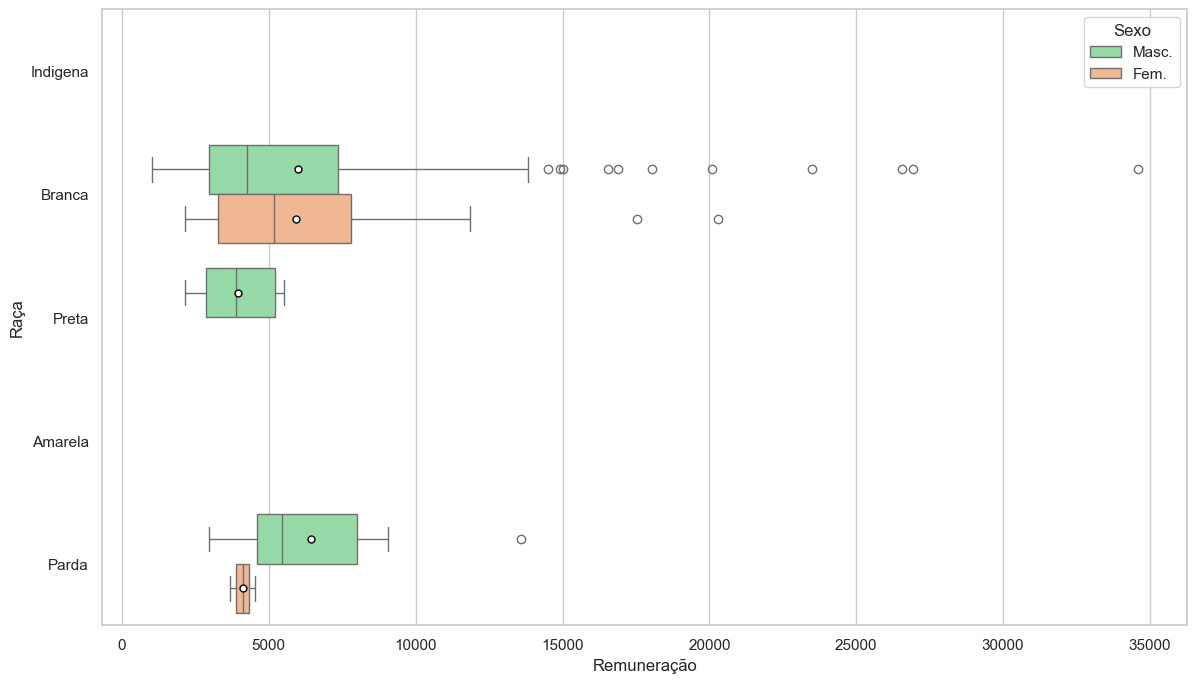

In [51]:
# Criação do boxplot para 2013:
box = sns.boxplot(x = 'Remuneração', y = 'Raça', hue = 'Sexo', data = RAIS_GERAL_2013_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = raca_2013.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_raca_2013.png", dpi = 300)

In [55]:
# Criação da tabela para o boxplot para 2014
RAIS_GERAL_2014_BOX = RAIS_GERAL_2014
RAIS_GERAL_2014_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2014_BOX["Raça"].replace(raca_2013, inplace = True)

RAIS_GERAL_2014_BOX

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,212420,62031,4,6,26,355220,Branca,"8,432.57",Masc.
1,317110,62015,6,6,41,355220,Branca,"1,884.31",Masc.
3,317110,62091,3,7,21,355220,Branca,"3,772.10",Masc.
5,317210,63119,3,7,18,355220,Branca,"1,266.62",Masc.
6,212405,63119,4,7,26,355220,Branca,"2,040.47",Masc.
...,...,...,...,...,...,...,...,...,...
330,317205,62091,4,9,29,355220,Branca,"2,408.38",Fem.
331,317115,62015,3,9,22,355220,Branca,763.43,Fem.
332,212405,62031,4,9,27,355220,Branca,"4,912.53",Fem.
333,212405,62031,4,9,27,355220,Branca,"3,990.72",Fem.


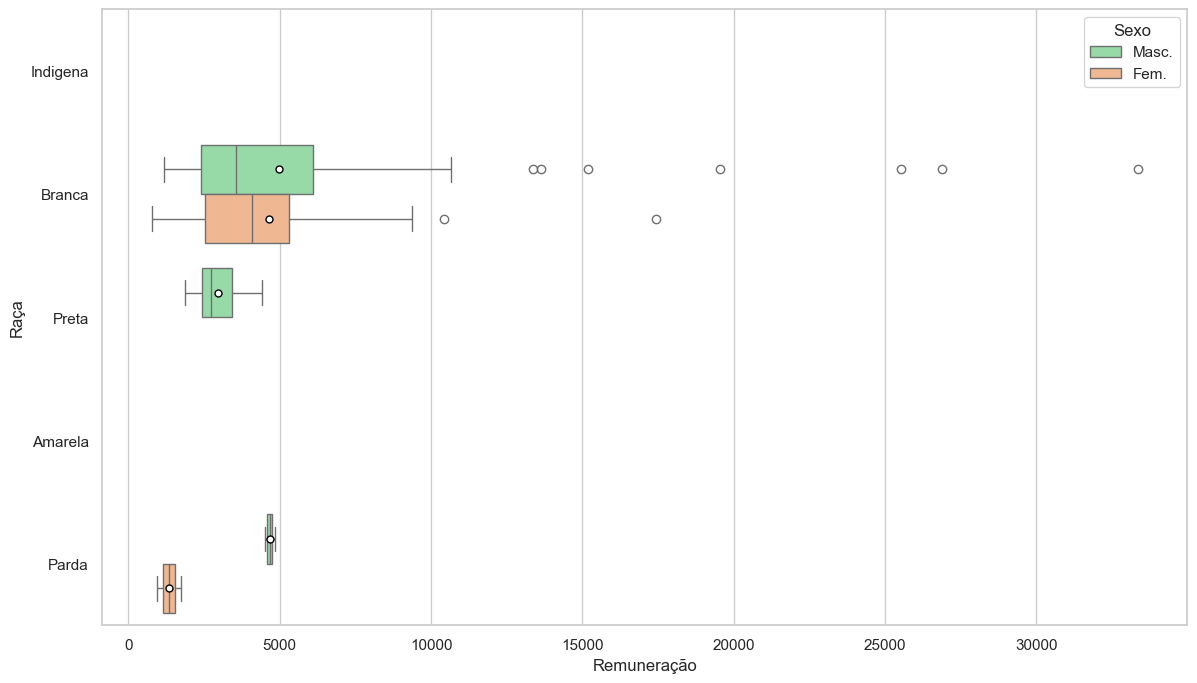

In [61]:
# Criação do boxplot para 2014:
box = sns.boxplot(x = 'Remuneração', y = 'Raça', hue = 'Sexo', data = RAIS_GERAL_2014_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = raca_2014.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("./figures/png/boxplot_sexo_raca_2014.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:


In [66]:
# Tabela principal para média e diferença salarial em 2012:
RAIS_GERAL_2012_MEDIA = pd.crosstab(RAIS_GERAL_2012["Raça"].replace(raca_2012), RAIS_GERAL_2012["Sexo"].replace(sexo), values = RAIS_GERAL_2012.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2012_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2012_MEDIA["Fem."] - RAIS_GERAL_2012_MEDIA["Masc."]) / RAIS_GERAL_2012_MEDIA["Masc."]) * 100)

RAIS_GERAL_2012_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Branca,"5,208.07","5,584.51",-6.74
Parda,"1,509.16","5,243.32",-71.22
Preta,NaN,"3,335.95",NaN


In [68]:
# Tabela principal para média e diferença salarial em 2013:
RAIS_GERAL_2013_MEDIA = pd.crosstab(RAIS_GERAL_2013["Raça"].replace(raca_2013), RAIS_GERAL_2013["Sexo"].replace(sexo), values = RAIS_GERAL_2013.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2013_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2013_MEDIA["Fem."] - RAIS_GERAL_2013_MEDIA["Masc."]) / RAIS_GERAL_2013_MEDIA["Masc."]) * 100)

RAIS_GERAL_2013_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Branca,"5,919.35","5,995.55",-1.27
Parda,"4,105.72","6,435.22",-36.20
Preta,NaN,"3,937.50",NaN


In [70]:
# Tabela principal para média e diferença salarial em 2014:
RAIS_GERAL_2014_MEDIA = pd.crosstab(RAIS_GERAL_2014["Raça"].replace(raca_2014), RAIS_GERAL_2014["Sexo"].replace(sexo), values = RAIS_GERAL_2014.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2014_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2014_MEDIA["Fem."] - RAIS_GERAL_2014_MEDIA["Masc."]) / RAIS_GERAL_2014_MEDIA["Masc."]) * 100)

RAIS_GERAL_2014_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Branca,"4,638.83","4,974.13",-6.74
Parda,"1,344.21","4,670.23",-71.22
Preta,NaN,"2,971.33",NaN


In [72]:
RAIS_GERAL_2012_MEDIA.insert(3, "Ano", "2012")

RAIS_GERAL_2013_MEDIA.insert(3, "Ano", "2013")

RAIS_GERAL_2014_MEDIA.insert(3, "Ano", "2014")

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2012_MEDIA, RAIS_GERAL_2013_MEDIA, RAIS_GERAL_2014_MEDIA]).reset_index()

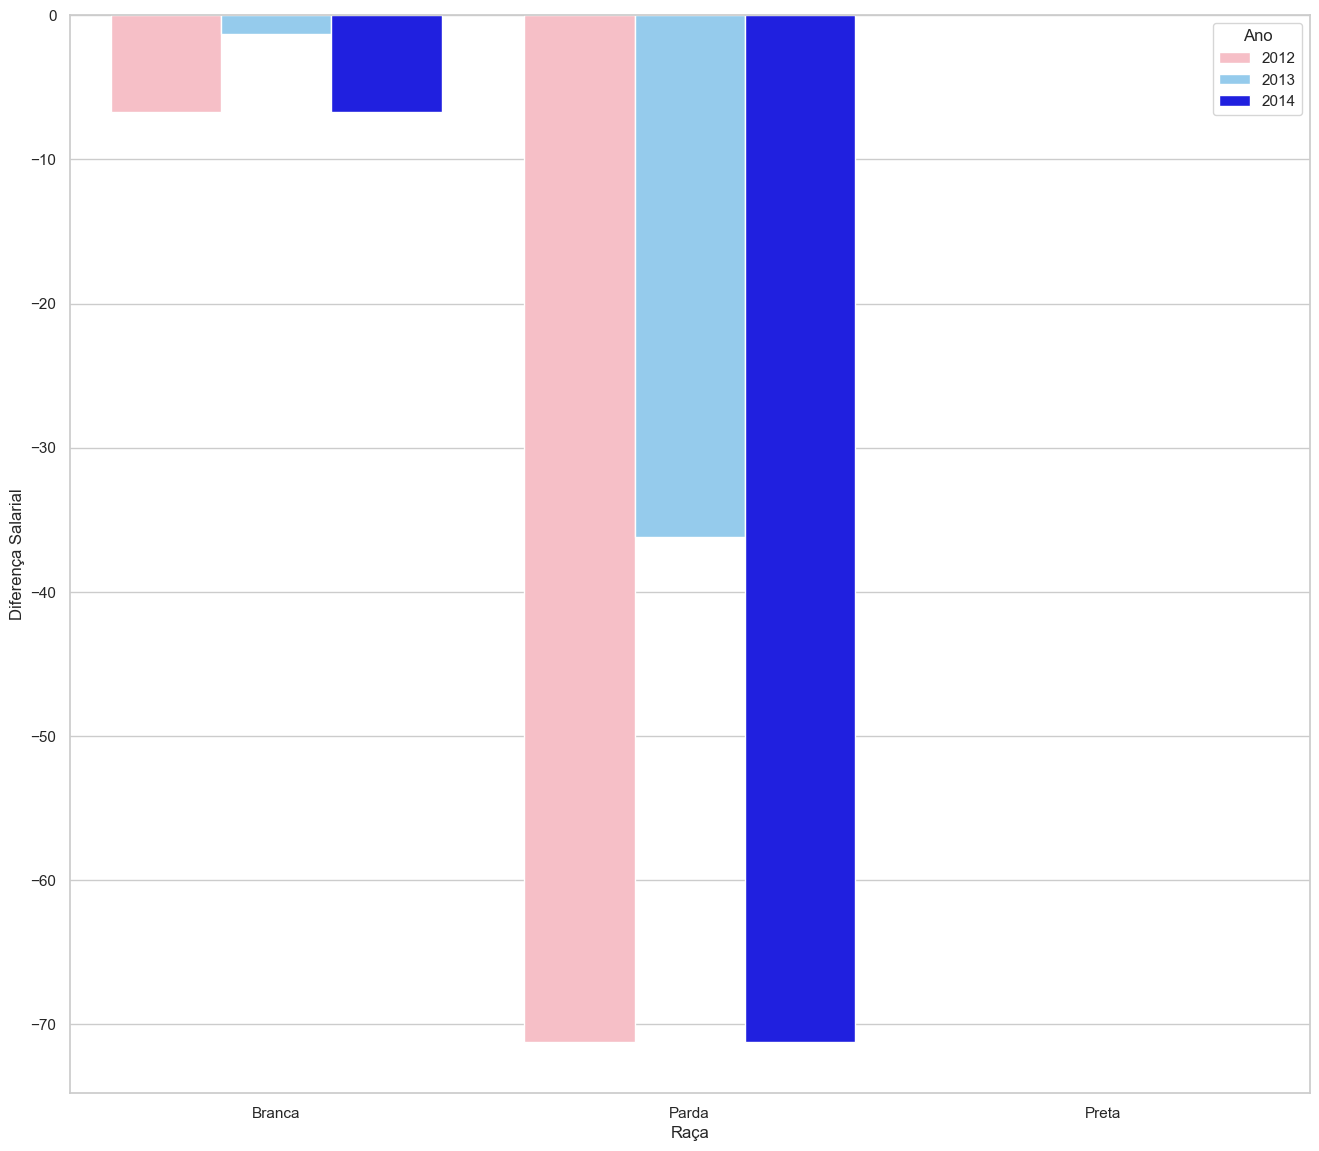

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração das cores para as barras
color_fem = "#FFB6C1"  # Cor para mulheres
color_masc = "#87CEFA"  # Cor para homens

# Criação do gráfico inicial
plt.figure(figsize=(16, 14))
sns.set(style="whitegrid")

# Criação da barra referente às diferenças salariais por Raça
sns.barplot(
    x="Raça", 
    y="Diferença Salarial", 
    hue="Ano", 
    data=RAIS_GERAL_MEDIA_GRAF, 
    palette={"2012": color_fem, "2013": color_masc, "2014": "blue"}
)

# Salvando o gráfico em formato SVG sem anotações adicionais
plt.savefig("./figures/svg/dif_salarial_sexo_raca_media.svg")


In [93]:
# Tabela principal para mediana e diferença salarial em 2012:
RAIS_GERAL_2012_MEDIANA = pd.crosstab(RAIS_GERAL_2012["Raça"].replace(raca_2012), RAIS_GERAL_2012["Sexo"].replace(sexo), values = RAIS_GERAL_2012.Remuneração, aggfunc = 'median')
RAIS_GERAL_2012_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2012_MEDIANA["Fem."] - RAIS_GERAL_2012_MEDIANA["Masc."]) / RAIS_GERAL_2012_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2012_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Branca,"4,587.32","3,977.69",15.33
Parda,"1,509.16","5,243.32",-71.22
Preta,NaN,"3,046.28",NaN


In [95]:
# Tabela principal para mediana e diferença salarial em 2013:
RAIS_GERAL_2013_MEDIANA = pd.crosstab(RAIS_GERAL_2013["Raça"].replace(raca_2013), RAIS_GERAL_2013["Sexo"].replace(sexo), values = RAIS_GERAL_2013.Remuneração, aggfunc = 'median')
RAIS_GERAL_2013_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2013_MEDIANA["Fem."] - RAIS_GERAL_2013_MEDIANA["Masc."]) / RAIS_GERAL_2013_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2013_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Branca,"5,191.83","4,243.49",22.35
Parda,"4,105.72","5,458.02",-24.78
Preta,NaN,"3,877.81",NaN


In [97]:
# Tabela principal para mediana e diferença salarial em 2014:
RAIS_GERAL_2014_MEDIANA = pd.crosstab(RAIS_GERAL_2014["Raça"].replace(raca_2014), RAIS_GERAL_2014["Sexo"].replace(sexo), values = RAIS_GERAL_2014.Remuneração, aggfunc = 'median')
RAIS_GERAL_2014_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2014_MEDIANA["Fem."] - RAIS_GERAL_2014_MEDIANA["Masc."]) / RAIS_GERAL_2014_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2014_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
Raça,,,
Branca,"4,085.93","3,542.93",15.33
Parda,"1,344.21","4,670.23",-71.22
Preta,NaN,"2,713.33",NaN


In [99]:
RAIS_GERAL_2012_MEDIANA.insert(3, "Ano", "2012")

RAIS_GERAL_2013_MEDIANA.insert(3, "Ano", "2013")

RAIS_GERAL_2014_MEDIANA.insert(3, "Ano", "2014")

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2012_MEDIANA, RAIS_GERAL_2013_MEDIANA, RAIS_GERAL_2014_MEDIANA]).reset_index()

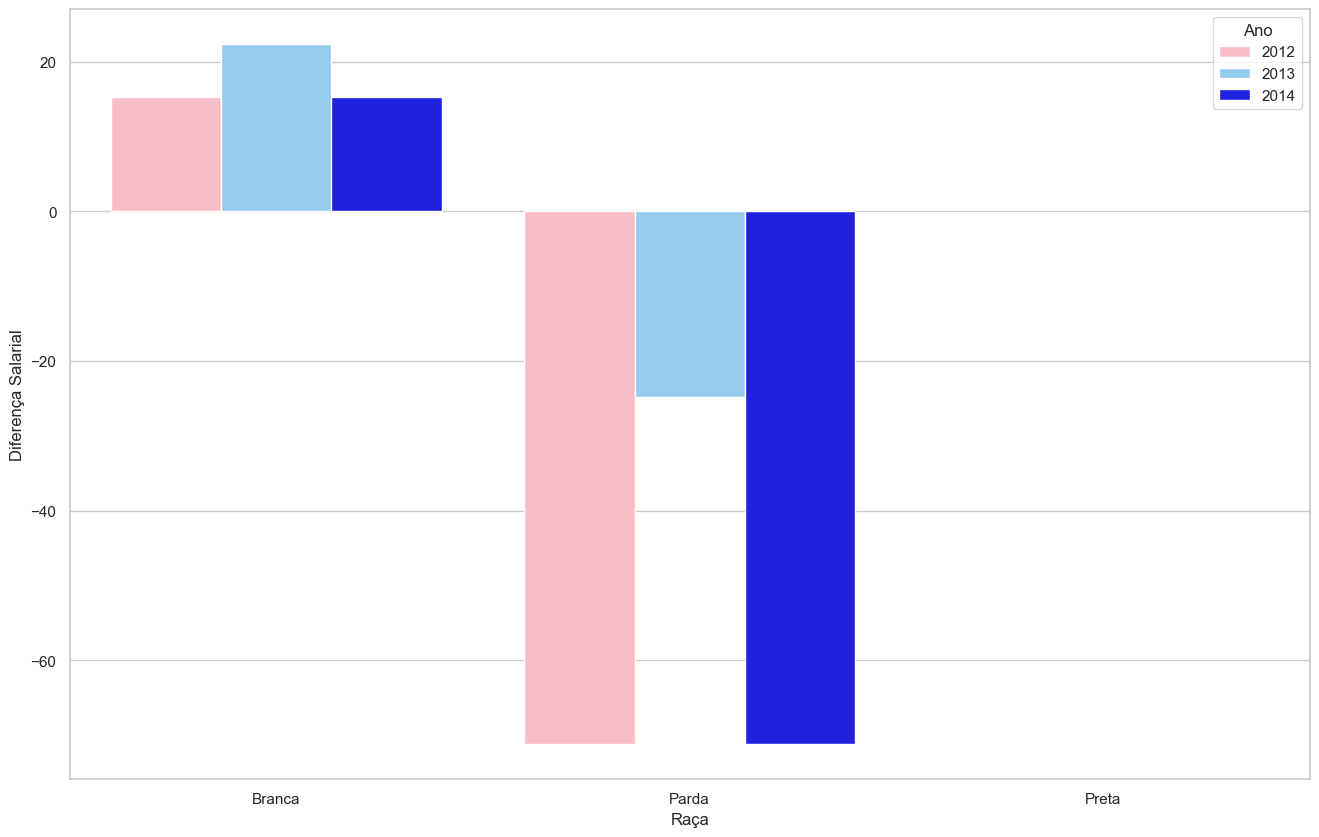

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração das cores para as barras
color_fem = "#FFB6C1"  # Cor para 2012 (feminino)
color_masc = "#87CEFA"  # Cor para 2013 (masculino)

# Criação do gráfico inicial
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Criação da barra referente às diferenças salariais por Raça
sns.barplot(
    x="Raça", 
    y="Diferença Salarial", 
    hue="Ano", 
    data=RAIS_GERAL_MEDIANA_GRAF, 
    palette={"2012": color_fem, "2013": color_masc, "2014": "blue"}
)

# Salvando o gráfico em formato SVG sem anotações adicionais
plt.savefig("./figures/svg/dif_salarial_sexo_raca_mediana.svg")


### Teste de hipótese para cada grupo de médias por CBOs: RESOLVER


In [106]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [112]:
TESTE_HIP_2012 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for raca in raca_2012:
    # Seleciona os dados para homens e mulheres de cada raça
    df1 = RAIS_GERAL_2012.query("Sexo == 'Masc.'").replace(raca_2012).query("Raça == '{}'".format(raca_2012[raca])).Remuneração
    df2 = RAIS_GERAL_2012.query("Sexo == 'Fem.'").replace(raca_2012).query("Raça == '{}'".format(raca_2012[raca])).Remuneração

    # Verifica se ambas as séries contêm dados
    if df1.empty or df2.empty:
        print(f"Dados ausentes para a raça {raca_2012[raca]}.")
        TESTE_HIP_2012.loc[raca_2012[raca]] = [None, None, 'Dados insuficientes']
        continue  # Pula para a próxima iteração se uma das séries estiver vazia

    # Calcula as medianas
    mean1 = df1.median()
    mean2 = df2.median()

    # Realiza o teste de hipótese com base nas medianas
    if mean1 < mean2:
        stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2012.loc[raca_2012[raca]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

# Mescla os resultados com os dados principais
RAIS_GERAL_2012_HIP = pd.merge(RAIS_GERAL_2012_MEDIA, TESTE_HIP_2012, left_index=True, right_index=True)
RAIS_GERAL_2012_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2012_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2012_HIP.head(7)


Dados ausentes para a raça Indigena.
Dados ausentes para a raça Preta.
Dados ausentes para a raça Amarela.


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Branca,"5,208.07","5,584.51",3099.5,0.01 > 0.26232...,Medianas estatisticamente iguais
Parda,"1,509.16","5,243.32",0.0,0.01 > 0.16667...,Medianas estatisticamente iguais
Preta,NaN,"3,335.95",None,None,Dados insuficientes


In [114]:
TESTE_HIP_2013 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for raca in raca_2013:
    # Seleciona os dados para homens e mulheres de cada raça
    df1 = RAIS_GERAL_2013.query("Sexo == 'Masc.'").replace(raca_2013).query("Raça == '{}'".format(raca_2013[raca])).Remuneração
    df2 = RAIS_GERAL_2013.query("Sexo == 'Fem.'").replace(raca_2013).query("Raça == '{}'".format(raca_2013[raca])).Remuneração

    # Verifica se ambas as séries contêm dados
    if df1.empty or df2.empty:
        print(f"Dados ausentes para a raça {raca_2013[raca]}.")
        TESTE_HIP_2013.loc[raca_2013[raca]] = [None, None, 'Dados insuficientes']
        continue  # Pula para a próxima iteração se uma das séries estiver vazia

    # Calcula as medianas
    mean1 = df1.median()
    mean2 = df2.median()

    # Realiza o teste de hipótese com base nas medianas
    if mean1 < mean2:
        stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2013.loc[raca_2013[raca]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

# Mescla os resultados com os dados principais
RAIS_GERAL_2013_HIP = pd.merge(RAIS_GERAL_2013_MEDIA, TESTE_HIP_2013, left_index=True, right_index=True)
RAIS_GERAL_2013_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2013_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2013_HIP.head(7)

Dados ausentes para a raça Indigena.
Dados ausentes para a raça Preta.
Dados ausentes para a raça Amarela.


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Branca,"5,919.35","5,995.55",3934.5,0.01 > 0.15208...,Medianas estatisticamente iguais
Parda,"4,105.72","6,435.22",4.0,0.01 > 0.13636...,Medianas estatisticamente iguais
Preta,NaN,"3,937.50",None,None,Dados insuficientes


In [117]:
TESTE_HIP_2014 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for raca in raca_2014:
    # Seleciona os dados para homens e mulheres de cada raça
    df1 = RAIS_GERAL_2014.query("Sexo == 'Masc.'").replace(raca_2014).query("Raça == '{}'".format(raca_2014[raca])).Remuneração
    df2 = RAIS_GERAL_2014.query("Sexo == 'Fem.'").replace(raca_2014).query("Raça == '{}'".format(raca_2014[raca])).Remuneração

    # Verifica se ambas as séries contêm dados
    if df1.empty or df2.empty:
        print(f"Dados ausentes para a raça {raca_2014[raca]}.")
        TESTE_HIP_2014.loc[raca_2014[raca]] = [None, None, 'Dados insuficientes']
        continue  # Pula para a próxima iteração se uma das séries estiver vazia

    # Calcula as medianas
    mean1 = df1.median()
    mean2 = df2.median()

    # Realiza o teste de hipótese com base nas medianas
    if mean1 < mean2:
        stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2014.loc[raca_2014[raca]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

# Mescla os resultados com os dados principais
RAIS_GERAL_2014_HIP = pd.merge(RAIS_GERAL_2014_MEDIA, TESTE_HIP_2014, left_index=True, right_index=True)
RAIS_GERAL_2014_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2014_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2014_HIP.head(7)


Dados ausentes para a raça Indigena.
Dados ausentes para a raça Preta.
Dados ausentes para a raça Amarela.


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Branca,"4,638.83","4,974.13",3099.5,0.01 > 0.26232...,Medianas estatisticamente iguais
Parda,"1,344.21","4,670.23",0.0,0.01 > 0.16667...,Medianas estatisticamente iguais
Preta,NaN,"2,971.33",None,None,Dados insuficientes
